## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 시작하기

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
print(tf.__version__)

2.10.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [7]:
a = tf.constant(2)
print(tf.rank(a))
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [9]:
b = tf.constant([2, 3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [11]:
c = tf.constant([[2, 3],[6, 7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [20]:
d = tf.constant([[[2,1],[2,1]],[[6,1],[2,1]],[[3,1],[2,1]]])
print(tf.rank(d))
print(tf.shape(d))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([3 2 2], shape=(3,), dtype=int32)


In [22]:
e = tf.constant(['Hello'])
print(tf.rank(e))
print(e)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


In [23]:
f = tf.constant('Hello')
print(tf.rank(f))
print(f)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(b'Hello', shape=(), dtype=string)


### 난수 생성

In [24]:
rand = tf.random.uniform([1], 0, 1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.15151119], shape=(1,), dtype=float32)


In [25]:
rand2 = tf.random.normal([1,2], 0, 1)  # shape, mean, stddev
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[-0.28699732  0.709485  ]], shape=(1, 2), dtype=float32)


In [27]:
rand3 = tf.random.normal(shape=(3,2), mean=0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[-0.6934891  -0.47248507]
 [ 0.88038206  0.40173545]
 [-0.5820102  -0.00821664]], shape=(3, 2), dtype=float32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [33]:
a = tf.constant(3)
b = tf.constant(2)

In [34]:
print(tf.add(a, b))
print(a+b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [35]:
print(tf.subtract(a,b))
print(a-b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [36]:
print(tf.multiply(a,b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [37]:
print(a, b)
c = tf.add(a, b).numpy()   # 계산한 결과를 numpy type로 변환
print(c, type(c))

tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(2, shape=(), dtype=int32)
5 <class 'numpy.int32'>


In [40]:
c_square = np.square(c, dtype=np.float32)
#c_square = np.square(c)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [42]:
t = tf.constant([[1., 2., 3.],[4.,5.,6.]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [43]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [44]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [47]:
t[:, 1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [49]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [50]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [52]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [53]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
tf.constant(2.0) + tf.constant(40) # Error 

In [ ]:
tf.constant(2.) + tf.constant(30., dtype=tf.float64) # 실수형이지만 float32, float64 인 경우도 Error

In [60]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(4.)   # float32

print(t2 + tf.cast(t, tf.float32))

tf.Tensor(34.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [73]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [61]:
@tf.function
def my_function(x):
    return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [62]:
def my_function_(x):
    return x**2 - 10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [63]:
tf_my_func = tf.function(my_function_)
print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [64]:
tf_my_func.python_function(2)

-13

In [66]:
def function_to_get_faster(x,y,b):
    x = tf.matmul(x, y)
    x = x + b
    return x

a_function_taht_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

a_function_taht_uses_a_graph(x1, y1, b1).numpy()

array([[12.]], dtype=float32)

In [67]:
def inner_function(x,y,b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[2.0],[3.0]])
    b = tf.constant(4.0)
    return inner_function(x, y, b)

outer_function(tf.constant([[1.0, 2.0]])).numpy()


array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [70]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))
      

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [76]:
class SequentialModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28,28))
        self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)
        
    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        return x
    
input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print('Eager time:', timeit.timeit(lambda: eager_model(input_data), number=10000))
print('Graph time:', timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager time: 26.65661319999981
Graph time: 12.84785920000013


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [77]:
X = tf.Variable(20.0)
print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [79]:
X = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = X**2

In [81]:
dy_dx = tape.gradient(y, X)
dy_dx.numpy()

6.0

In [82]:
X2 = tf.Variable(4)              # 한번만 사용 가능하므로 Error 발생
dy_dx.numpy()

RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

In [89]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y_sq = y**2
    z = x**2 + tf.stop_gradient(y_sq)
    
grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx: ', grad['x'])
print('dz/y: ', grad['y'])

dz/dx:  tf.Tensor(4.0, shape=(), dtype=float32)
dz/y:  None


In [97]:
weights = tf.Variable(tf.random.normal((3,2)), name='weight')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y= x @ weights + biases
    loss = tf.reduce_mean(y**2)
    

In [98]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [99]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [104]:
weights2 = tf.Variable(tf.random.normal((3,2)), name='weight')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x2 = [[4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])



In [106]:
print(weights2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [107]:
del tape

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [108]:
def sigmoid(x):
    return (1 / (1+np.exp(-x)))

def Neuron(x, W, bias = 0):
    z = x * W + bias
    return sigmoid(z)

In [109]:
x = tf.random.normal((1,2), 0, 1)
W = tf.random.normal((1,2), 0, 1)

print('x.shape;', x.shape)
print('W.shape;', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape; (1, 2)
W.shape; (1, 2)
tf.Tensor([[-1.2969894 -3.016533 ]], shape=(1, 2), dtype=float32)
tf.Tensor([[ 0.29632956 -2.671634  ]], shape=(1, 2), dtype=float32)
[[0.40508145 0.99968386]]


In [110]:
x = tf.random.normal((2,1), 0, 1)
W = tf.random.normal((2,1), 0, 1)

print('x.shape;', x.shape)
print('W.shape;', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape; (2, 1)
W.shape; (2, 1)
tf.Tensor(
[[-0.36582363]
 [-0.08451479]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[ 0.6071165 ]
 [-0.91244984]], shape=(2, 1), dtype=float32)
[[0.4447027 ]
 [0.51926935]]


In [111]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((2,1), 0, 1)

print('x.shape;', x.shape)
print('W.shape;', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape; (1,)
W.shape; (2, 1)
tf.Tensor([-0.885468], shape=(1,), dtype=float32)
tf.Tensor(
[[-0.24998091]
 [ 0.35052246]], shape=(2, 1), dtype=float32)
[[0.55511266]
 [0.42302287]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [112]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print('y: ', y)

[0.747674]
y:  1


In [115]:
for i in range(1000):
    output = Neuron(x, W)
    error = y - output
    W = W + x * 0.1 * error
    
    if i % 100 == 99:
        print('{}\t{}\t{}\t{}'.format(i+1, error, output, W))

100	[0.00476629]	[0.9952337]	[5.3418827]
200	[0.0045504]	[0.9954496]	[5.3884377]
300	[0.00435311]	[0.9956469]	[5.43293]
400	[0.00417227]	[0.99582773]	[5.475536]
500	[0.00400579]	[0.9959942]	[5.5164056]
600	[0.00385201]	[0.996148]	[5.555676]
700	[0.00370967]	[0.9962903]	[5.593469]
800	[0.00357741]	[0.9964226]	[5.6298904]
900	[0.00345427]	[0.99654573]	[5.665035]
1000	[0.00333929]	[0.9966607]	[5.69899]


In [119]:
def Neuron2(x, W, bias=0):
    z = tf.matmul(x, W, transpose_b=True) + bias
    return sigmoid(z)


In [122]:
x = tf.random.normal((1,3), 0, 1)
y = tf.ones(1)
W = tf.random.normal((1,3), 0, 1)

print(Neuron2(x, W))
print('y: ', y)

[[0.19354026]]
y:  tf.Tensor([1.], shape=(1,), dtype=float32)


In [124]:
for i in range(1000):
    output = Neuron2(x, W)
    error = y - output
    
    W = W + x * 0.1 * error
    
    if i % 100 == 99:
        print('{}\t{}\t{}\t{}'.format(i+1, error, output, W))

100	[[0.01706904]]	[[0.98293096]]	[[ 0.27649528 -2.3283932   0.8447605 ]]
200	[[0.01117474]]	[[0.98882526]]	[[ 0.20925939 -2.5400543   0.9406785 ]]
300	[[0.00829881]]	[[0.9917012]]	[[ 0.16217496 -2.6882787   1.0078484 ]]
400	[[0.0065977]]	[[0.9934023]]	[[ 0.12593079 -2.8023772   1.0595535 ]]
500	[[0.00547409]]	[[0.9945259]]	[[ 0.09646635 -2.8951316   1.1015873 ]]
600	[[0.00467712]]	[[0.9953229]]	[[ 0.07164436 -2.973272    1.1369979 ]]
700	[[0.00408226]]	[[0.99591774]]	[[ 0.05020116 -3.0407767   1.1675888 ]]
800	[[0.00362152]]	[[0.9963785]]	[[ 0.0313273 -3.100194   1.1945146]]
900	[[0.00325418]]	[[0.9967458]]	[[ 0.01447313 -3.1532516   1.2185587 ]]
1000	[[0.00295442]]	[[0.9970456]]	[[-7.5165363e-04 -3.2011786e+00  1.2402779e+00]]


In [131]:
x = tf.random.normal((1, 3), 0, 1)
weights = tf.random.normal((1, 3), 0, 1)
bias = tf.zeros((1, 1))

y = tf.ones((1,))

print('x\t: {} \nweights\t: {} \nbias\t: {}'.format(x, weights, bias))

x	: [[ 0.42726466  0.4012987  -1.2289629 ]] 
weights	: [[-0.7318129   1.1435473  -0.31951398]] 
bias	: [[0.]]


In [133]:
for i in range(1000):
    output = Neuron2(x, weights, bias=bias)
    error = y - output
    weights = weights + x * 0.1 * error
    bias = bias + 1 * 0.1 * error
    
    if i % 100 == 99:
         print('{}\t{}\t{}\t{}'.format(i+1, error, output, weights))
        

100	[[0.00320679]]	[[0.9967932]]	[[ 0.04687554  1.8749107  -2.5592933 ]]
200	[[0.00293857]]	[[0.99706143]]	[[ 0.05998145  1.8872205  -2.59699   ]]
300	[[0.00271165]]	[[0.99728835]]	[[ 0.07203428  1.8985409  -2.6316578 ]]
400	[[0.00251728]]	[[0.9974827]]	[[ 0.08319057  1.909019   -2.663747  ]]
500	[[0.00234884]]	[[0.99765116]]	[[ 0.09357446  1.9187717  -2.6936147 ]]
600	[[0.00220162]]	[[0.9977984]]	[[ 0.10328586  1.9278934  -2.7215486 ]]
700	[[0.00207162]]	[[0.9979284]]	[[ 0.11240651  1.9364599  -2.7477822 ]]
800	[[0.00195622]]	[[0.9980438]]	[[ 0.1210042  1.9445351 -2.7725115]]
900	[[0.00185287]]	[[0.99814713]]	[[ 0.12913558  1.952172   -2.7959    ]]
1000	[[0.00176001]]	[[0.99824]]	[[ 0.13684852  1.9594162  -2.818086  ]]


In [134]:
print('x\t: {} \nweights\t: {} \nbias\t: {}'.format(x, weights, bias))

x	: [[ 0.42726466  0.4012987  -1.2289629 ]] 
weights	: [[ 0.13684852  1.9594162  -2.818086  ]] 
bias	: [[2.0330772]]


### AND Gate

In [136]:
X = np.array([[1,1],[1,0],[0,1],[0,0]])
Y = np.array([[1],[0],[0],[0]])

W = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
    if i % 200 == 0:
        print('Epoch {:4d}\tError Sum {}'.format(i, error_sum))
print('\n가중치\t: {}'.format(W))
print('편향\t: {}'.format(b))

Epoch    0	Error Sum [-1.1636937]
Epoch  200	Error Sum [-0.11003061]
Epoch  400	Error Sum [-0.06560722]
Epoch  600	Error Sum [-0.04662562]
Epoch  800	Error Sum [-0.03605883]
Epoch 1000	Error Sum [-0.02934265]
Epoch 1200	Error Sum [-0.0247068]
Epoch 1400	Error Sum [-0.02132045]
Epoch 1600	Error Sum [-0.01874048]
Epoch 1800	Error Sum [-0.01671079]

가중치	: [6.9731603 6.976305 ]
편향	: [-11.638818]


In [137]:
for i in range(4):
    print('X: {} Y: {} Output: {}'.format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X: [1 1] Y: [1] Output: [0.909755]
X: [1 0] Y: [0] Output: [0.00932528]
X: [0 1] Y: [0] Output: [0.00935437]
X: [0 0] Y: [0] Output: [8.81702e-06]


### OR Gate

In [143]:
X2 = np.array([[1,1],[1,0],[0,1],[0,0]])
Y2 = np.array([[1],[1],[1],[0]])

W2 = tf.random.normal([2],0,1)
b2 = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X2[j] * W2) + b_x + b2)
        error = Y2[j][0] - output
        W2 = W2 + X2[j] * 0.1 * error
        b2 = b2 + b_x * 0.1 * error
        error_sum += error
    if i % 200 == 0:
        print('Epoch {:4d}\tError Sum {}'.format(i, error_sum))
        
print('\n가중치\t: {}'.format(W2))
print('편향\t: {}'.format(b2))

Epoch    0	Error Sum [-0.06578851]
Epoch  200	Error Sum [-0.05645753]
Epoch  400	Error Sum [-0.0275473]
Epoch  600	Error Sum [-0.01814277]
Epoch  800	Error Sum [-0.013477]
Epoch 1000	Error Sum [-0.01069978]
Epoch 1200	Error Sum [-0.00886139]
Epoch 1400	Error Sum [-0.00755714]
Epoch 1600	Error Sum [-0.00658422]
Epoch 1800	Error Sum [-0.00583199]

가중치	: [8.181612 8.18207 ]
편향	: [-4.625271]


In [144]:
for i in range(4):
    print('X: {} Y: {} Output: {}'.format(X2[i], Y2[i], sigmoid(np.sum(X[i] * W2) + b2)))

X: [1 1] Y: [1] Output: [0.999992]
X: [1 0] Y: [1] Output: [0.972249]
X: [0 1] Y: [1] Output: [0.97226137]
X: [0 0] Y: [0] Output: [0.00970587]


### XOR Gate

In [145]:
X3 = np.array([[1,1],[1,0],[0,1],[0,0]])
Y3 = np.array([[0],[1],[1],[0]])

W3 = tf.random.normal([2],0,1)
b3 = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
        error = Y3[j][0] - output
        W3 = W3 + X3[j] * 0.1 * error
        b3 = b3 + b_x * 0.1 * error
        error_sum += error
    if i % 200 == 0:
        print('Epoch {:4d}\tError Sum {}'.format(i, error_sum))
        
print('\n가중치\t: {}'.format(W3))
print('편향\t: {}'.format(b3))

Epoch    0	Error Sum [-0.32551533]
Epoch  200	Error Sum [-0.00130904]
Epoch  400	Error Sum [-5.3048134e-05]
Epoch  600	Error Sum [-2.3245811e-06]
Epoch  800	Error Sum [-1.013279e-06]
Epoch 1000	Error Sum [-1.013279e-06]
Epoch 1200	Error Sum [-1.013279e-06]
Epoch 1400	Error Sum [-1.013279e-06]
Epoch 1600	Error Sum [-1.013279e-06]
Epoch 1800	Error Sum [-1.013279e-06]

가중치	: [ 5.1279664e-02 -2.0749867e-06]
편향	: [-0.999997]


In [146]:
for i in range(4):
    print('X3: {} Y3: {} Output: {}'.format(X3[i], Y3[i], sigmoid(np.sum(X[i] * W3) + b3)))

X3: [1 1] Y3: [0] Output: [0.27914244]
X3: [1 0] Y3: [1] Output: [0.27914283]
X3: [0 1] Y3: [1] Output: [0.2689416]
X3: [0 0] Y3: [0] Output: [0.26894203]


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
np.random.seed(111)

X4 = np.array([[1,1],[1,0],[0,1],[0,0]])
Y4 = np.array([[0],[1],[1],[0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2, )), 
                    Dense(units=1, activation='sigmoid')])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X4, Y4, epochs=10000, batch_size=1, verbose=0)

In [18]:
model.predict(X4)

1/1 [==============================] - 0s 81ms/step


array([[0.02725513],
       [0.97077143],
       [0.9656227 ],
       [0.03059196]], dtype=float32)

## 시각화 사용

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 

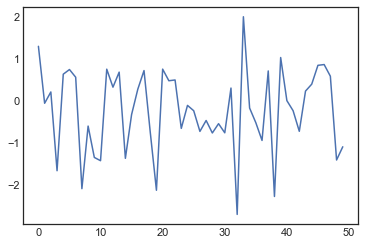

In [39]:
plt.style.use('seaborn-white')
x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y)
plt.show()

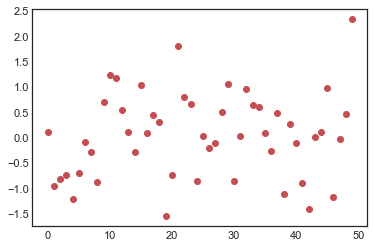

In [41]:
plt.style.use('seaborn-white')
x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y, 'ro')
plt.show()

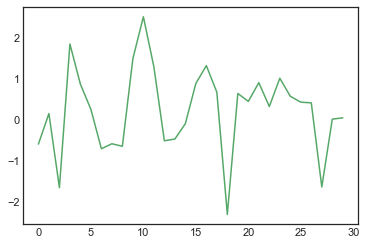

In [45]:
plt.style.use('seaborn-white')
x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'g-')
plt.show()

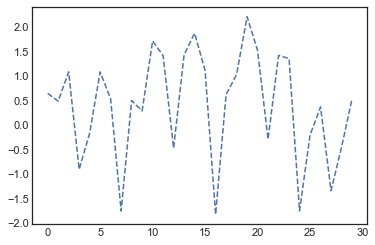

In [54]:
plt.style.use('seaborn-white')
x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'b--')
plt.show()

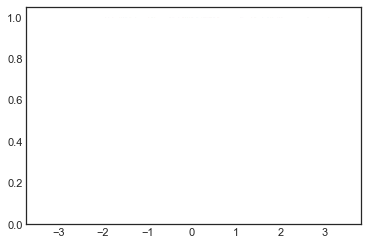

In [55]:
random_normal = tf.random.normal([1000], 0, 1)
plt.hist(random_normal, bins=5)
plt.show()

In [53]:
random_normal

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 2.36937851e-02, -1.93056520e-02, -6.00927137e-02,  5.51543772e-01,
       -1.01300859e+00,  9.13035214e-01,  1.49301839e+00, -1.82670578e-02,
       -8.96311820e-01, -2.26872981e-01,  1.09194946e+00,  2.99742877e-01,
        9.14202332e-01, -3.73978347e-01,  2.38589239e+00, -7.37045586e-01,
        1.37527096e+00, -1.74097061e+00,  1.21426439e+00,  4.40572590e-01,
       -2.42506832e-01, -8.11995566e-01, -3.89734119e-01,  7.17075095e-02,
        7.04275489e-01,  3.16141248e-01, -7.88032532e-01, -1.75143063e+00,
       -1.83884370e+00, -5.30816197e-01,  3.13706487e-01, -1.50119460e+00,
       -1.20419788e+00,  1.56918675e-01,  1.01431692e+00, -3.75042826e-01,
       -6.92560136e-01,  8.29230249e-01,  8.88258293e-02,  2.21814796e-01,
       -1.18996334e+00, -4.37212825e-01,  1.82236874e+00, -1.70617747e+00,
       -7.38200903e-01, -3.03459108e-01, -7.76875913e-01,  8.81308615e-01,
       -1.30208337e+00,  4.60530877e-01, -1.0037010

### XOR Gate의 'LOSS' 시각화


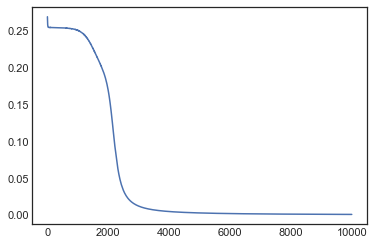

In [49]:
plt.plot(history.history['loss'])